In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings("ignore")

In [81]:
df=pd.read_csv('/content/AirPassengers.csv',parse_dates=['Month'],index_col='Month')
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [82]:
time_series=pd.Series(df['#Passengers'])


In [83]:
def adf_test(series):
    result = adfuller(series)
    print("ADF statistic : ",result[0])
    print("P-value : ",result[1])
    print("Critical values : ")
    for i, value in result[4].items():
        print(f" {i}:{value}")
    if result[1] <=0.05:
        print("The Time Series is Stationary")
    else:
        print("The Time Series is Not Stationary")

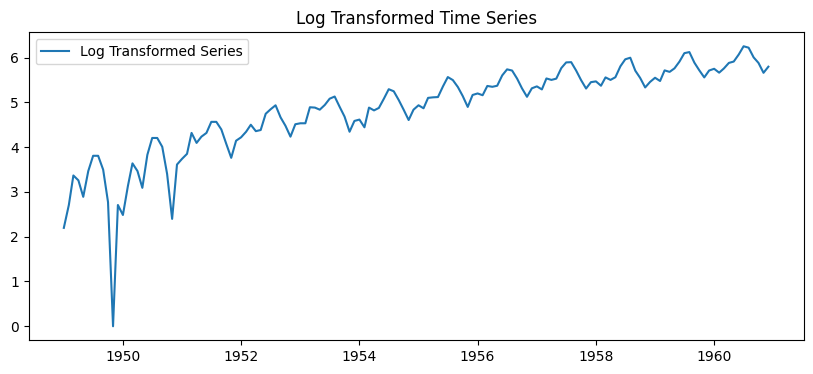


ADF Test for Log Transformed Series:
ADF statistic :  -3.431477382757119
P-value :  0.009931484875192673
Critical values : 
 1%:-3.4816817173418295
 5%:-2.8840418343195267
 10%:-2.578770059171598
The Time Series is Stationary


In [84]:
log_series = np.log(time_series - time_series.min() + 1)


plt.figure(figsize=(10, 4))
plt.plot(log_series, label='Log Transformed Series')
plt.title("Log Transformed Time Series")
plt.legend()
plt.show()

# ADF Test for Log Transformed Series
print("\nADF Test for Log Transformed Series:")
adf_test(log_series)

In [124]:
model = ARIMA(log_series, order=(1, 2,2 )) # p d q
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(1, 2, 2)   Log Likelihood                 -65.872
Date:                Wed, 29 Jan 2025   AIC                            139.743
Time:                        05:37:18   BIC                            151.566
Sample:                    01-01-1949   HQIC                           144.548
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5303      0.032     16.348      0.000       0.467       0.594
ma.L1         -1.9670      0.094    -20.944      0.000      -2.151      -1.783
ma.L2          0.9723      0.094     10.328      0.0

In [125]:
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)
forecast

,predicted_mean
1961-01-01,5.891638
1961-02-01,5.945714
1961-03-01,5.977780
1961-04-01,5.998174
1961-05-01,6.012378
1961-06-01,6.023299
1961-07-01,6.032480
1961-08-01,6.040738
1961-09-01,6.048506
1961-10-01,6.056015


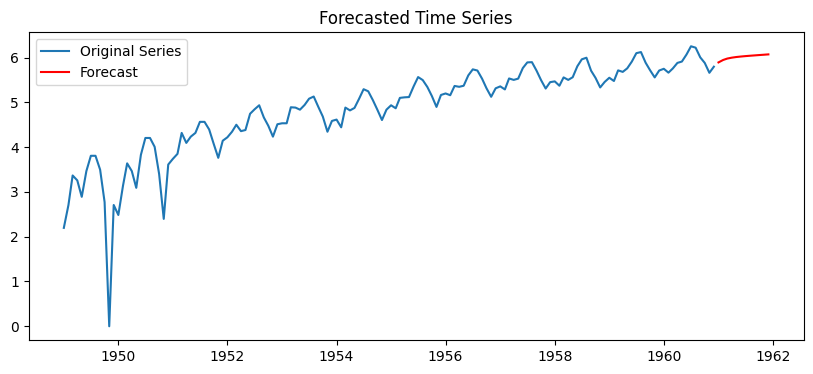

In [126]:
plt.figure(figsize=(10, 4))
plt.plot(log_series, label='Original Series')
plt.plot(forecast, label='Forecast', color='red')
plt.title("Forecasted Time Series")
plt.legend()
plt.show()

